# Session 1: 양자 컴퓨팅 첫걸음 (60분)

## 학습 목표
- 큐비트와 양자 상태 이해
- 기본 양자 게이트 사용
- Bell State 만들기
- 양자 동전과 주사위 만들기


In [1]:
# 필요한 라이브러리 임포트
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeKolkataV2
from qiskit import transpile
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 백엔드 설정
backend = FakeKolkataV2()
sampler = Sampler(backend)

print("준비 완료! 양자 컴퓨팅을 시작합니다! 🚀")

준비 완료! 양자 컴퓨팅을 시작합니다! 🚀


## Part 1: 큐비트 이해하기

### 1.1 고전 비트 vs 양자 비트

In [2]:
# 고전 비트: 0 또는 1
classical_bit = 0  # 또는 1
print(f"고전 비트: {classical_bit}")
print("고전 비트는 0 또는 1 중 하나의 값만 가집니다.\n")

# 양자 비트: 0과 1의 중첩
# |ψ⟩ = α|0⟩ + β|1⟩
alpha = 1/np.sqrt(2)  # 0의 확률 진폭
beta = 1/np.sqrt(2)   # 1의 확률 진폭

print(f"양자 비트: {alpha:.3f}|0⟩ + {beta:.3f}|1⟩")
print(f"측정 시 0이 나올 확률: {alpha**2:.1%}")
print(f"측정 시 1이 나올 확률: {beta**2:.1%}")

고전 비트: 0
고전 비트는 0 또는 1 중 하나의 값만 가집니다.

양자 비트: 0.707|0⟩ + 0.707|1⟩
측정 시 0이 나올 확률: 50.0%
측정 시 1이 나올 확률: 50.0%


### 1.2 첫 번째 양자 회로 만들기

빈 양자 회로:

q: 큐비트 (양자 비트)
c: 클래식 비트 (측정 결과 저장)


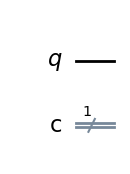

In [ ]:
# 1개의 큐비트와 1개의 측정용 비트를 가진 회로 생성
qc = QuantumCircuit(1, 1)

# 회로 그리기
print("빈 양자 회로:")
# print(qc.draw())
qc.draw('mpl')
print("\nq: 큐비트 (양자 비트)")
print("c: 클래식 비트 (측정 결과 저장)")

### 1.3 큐비트 상태 시각화

In [ ]:
# |0⟩ 상태 시각화
qc_zero = QuantumCircuit(1)
state_zero = Statevector(qc_zero)

print("초기 상태 |0⟩:")
print(f"상태 벡터: {state_zero.data}")
print("\nBloch 구면에서의 위치:")
plot_bloch_multivector(state_zero)

## Part 2: 기본 양자 게이트

### 2.1 X 게이트 (NOT 게이트)

X 게이트 회로:

측정 결과: {'1': 991, '0': 9}
X 게이트는 |0⟩을 |1⟩로 바꿉니다!


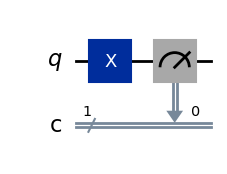

In [23]:
# X 게이트: 0을 1로, 1을 0으로
qc_x = QuantumCircuit(1, 1)
qc_x.x(0)  # 큐비트 0에 X 게이트 적용
qc_x.measure(0, 0)  # 측정

print("X 게이트 회로:")
qc_x.draw('mpl')

# 실행
transpiled = transpile(qc_x, backend)
job = sampler.run([(transpiled, [])], shots=1000)
result = job.result()
counts = result[0].data.c.get_counts()

print(f"\n측정 결과: {counts}")
print("X 게이트는 |0⟩을 |1⟩로 바꿉니다!")

### 2.2 H 게이트 (Hadamard 게이트) - 중첩 생성!

Hadamard 게이트 회로:
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


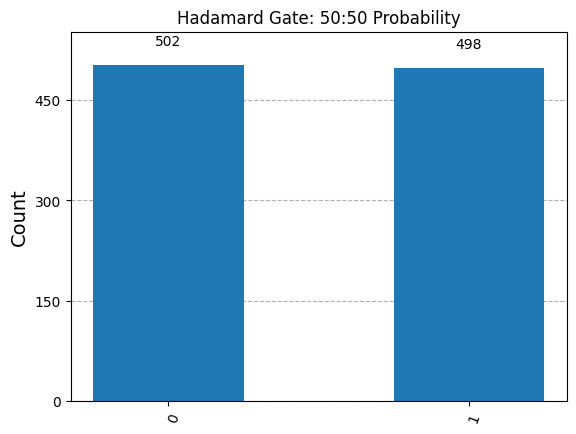

H 게이트는 균등한 중첩을 만듭니다!
0이 나올 확률: 50.2%
1이 나올 확률: 49.8%


In [20]:
# H 게이트: 중첩 상태 생성
qc_h = QuantumCircuit(1, 1)
qc_h.h(0)  # Hadamard 게이트
qc_h.measure(0, 0)

print("Hadamard 게이트 회로:")
print(qc_h.draw())

# 실행
transpiled = transpile(qc_h, backend)
job = sampler.run([(transpiled, [])], shots=1000)
result = job.result()
counts = result[0].data.c.get_counts()

# 결과 시각화
plot_histogram(counts)
plt.title("Hadamard Gate: 50:50 Probability")
plt.show()

print("H 게이트는 균등한 중첩을 만듭니다!")
print(f"0이 나올 확률: {counts.get('0', 0)/1000:.1%}")
# print(f"0이 나올 확률: {counts['0']/1000:.1%}")
print(f"1이 나올 확률: {counts.get('1', 0)/1000:.1%}")
# print(f"0이 나올 확률: {counts['1']/1000:.1%}")

### 2.3 게이트 조합하기

게이트 조합 (H-X-H):

결과: {'0': 997, '1': 3}
H-X-H = Z 게이트와 같습니다!


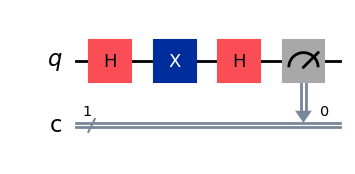

In [30]:
# 여러 게이트를 순서대로 적용
qc_combo = QuantumCircuit(1, 1)

# H → X → H 순서로 적용
# qc_combo.x(0)    # 1 상태
qc_combo.h(0)    # 중첩 생성
qc_combo.x(0)    # NOT
qc_combo.h(0)    # 다시 중첩
qc_combo.measure(0, 0)

print("게이트 조합 (H-X-H):")
qc_combo.draw('mpl')

# 실행
transpiled = transpile(qc_combo, backend)
job = sampler.run([(transpiled, [])], shots=1000)
result = job.result()
counts = result[0].data.c.get_counts()

print(f"\n결과: {counts}")
print("H-X-H = Z 게이트와 같습니다!")

## Part 3: Bell State - 양자 얽힘 만들기! (15분)

### 3.1 CNOT 게이트 - 두 큐비트 연결

CNOT 게이트 회로:

결과: {'11': 972, '01': 17, '00': 2, '10': 9}
첫 번째가 1이므로 두 번째도 1이 됩니다 → 11


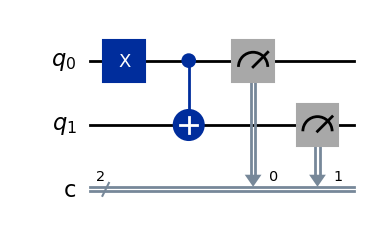

In [32]:
# CNOT 게이트: 제어 큐비트가 1이면 타겟 큐비트 반전
qc_cnot = QuantumCircuit(2, 2)

# 첫 번째 큐비트를 1로 설정
qc_cnot.x(0)
# CNOT: 0번이 제어, 1번이 타겟
qc_cnot.cx(0, 1)
qc_cnot.measure([0, 1], [0, 1])

print("CNOT 게이트 회로:")
qc_cnot.draw('mpl')

# 실행
transpiled = transpile(qc_cnot, backend)
job = sampler.run([(transpiled, [])], shots=1000)
result = job.result()
counts = result[0].data.c.get_counts()

print(f"\n결과: {counts}")
print("첫 번째가 1이므로 두 번째도 1이 됩니다 → 11")

### 3.2 Bell State 생성 - 양자 얽힘!

Bell State 회로:

이 회로는 |00⟩ + |11⟩ 상태를 만듭니다!


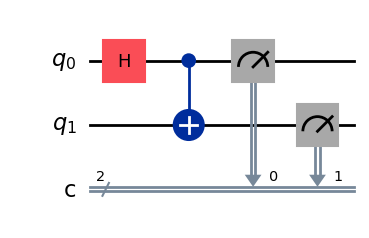

In [34]:
# Bell State: 두 큐비트가 완벽하게 얽힌 상태
bell = QuantumCircuit(2, 2)

# Step 1: 첫 번째 큐비트를 중첩 상태로
bell.h(0)

# Step 2: CNOT으로 얽힘 생성
bell.cx(0, 1)

# 측정
bell.measure([0, 1], [0, 1])

print("Bell State 회로:")
bell.draw('mpl')
print("\n이 회로는 |00⟩ + |11⟩ 상태를 만듭니다!")

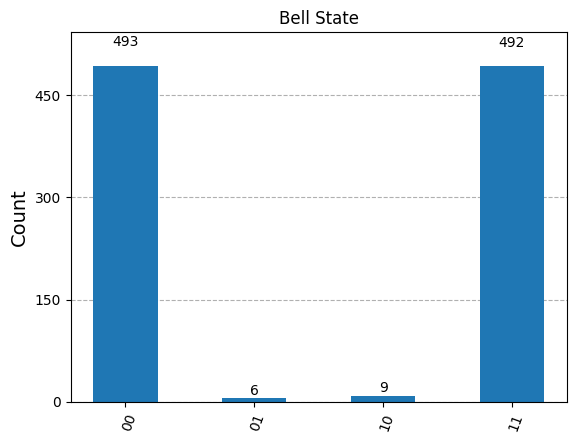

🎉 양자 얽힘 성공!
00과 11만 나타납니다 - 두 큐비트가 얽혀있습니다!

한 큐비트를 측정하면 다른 큐비트의 상태가 즉시 결정됩니다!


In [35]:
# Bell State 실행 및 결과 확인
transpiled = transpile(bell, backend)
job = sampler.run([(transpiled, [])], shots=1000)
result = job.result()
counts = result[0].data.c.get_counts()

# 시각화
plot_histogram(counts)
plt.title("Bell State")
plt.show()

print("🎉 양자 얽힘 성공!")
print("00과 11만 나타납니다 - 두 큐비트가 얽혀있습니다!")
print("\n한 큐비트를 측정하면 다른 큐비트의 상태가 즉시 결정됩니다!")

### 3.3 다른 Bell States 만들기

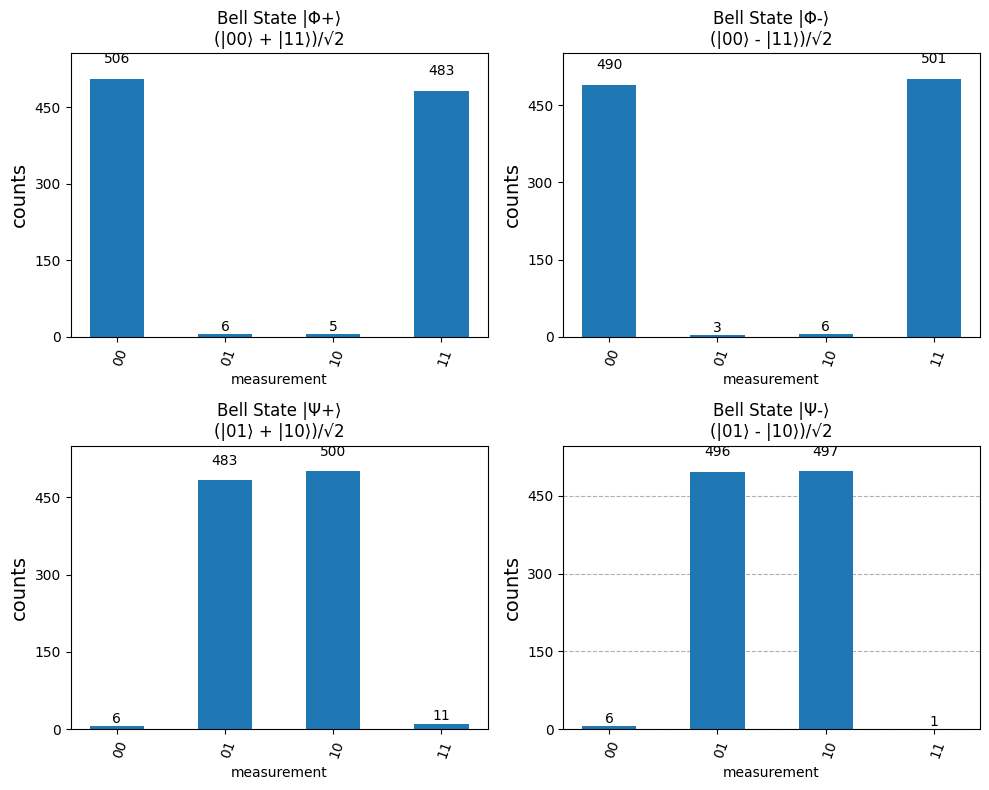

In [38]:
# 4가지 Bell States
bell_states = {
    'Φ+': '(|00⟩ + |11⟩)/√2',
    'Φ-': '(|00⟩ - |11⟩)/√2',
    'Ψ+': '(|01⟩ + |10⟩)/√2',
    'Ψ-': '(|01⟩ - |10⟩)/√2'
}

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for idx, (name, formula) in enumerate(bell_states.items()):
    qc = QuantumCircuit(2, 2)
    
    # Bell state 생성
    if idx == 0:  # Φ+
        qc.h(0)
        qc.cx(0, 1)
    elif idx == 1:  # Φ-
        qc.h(0)
        qc.cx(0, 1)
        qc.z(0)
    elif idx == 2:  # Ψ+
        qc.h(0)
        qc.cx(0, 1)
        qc.x(1)
    else:  # Ψ-
        qc.h(0)
        qc.cx(0, 1)
        qc.x(1)
        qc.z(0)
    
    qc.measure([0, 1], [0, 1])
    
    # 실행
    transpiled = transpile(qc, backend)
    job = sampler.run([(transpiled, [])], shots=1000)
    result = job.result()
    counts = result[0].data.c.get_counts()
    
    # 시각화
    # axes[idx].bar(counts.keys(), counts.values())
    plot_histogram(counts, ax=axes[idx], sort='asc')
    axes[idx].set_title(f'Bell State |{name}⟩\n{formula}')
    axes[idx].set_xlabel('measurement')
    axes[idx].set_ylabel('counts')

plt.tight_layout()
plt.show()

## Part 4: 실습 프로젝트

### 4.1 양자 동전 만들기

In [41]:
# 양자 동전: 공정한 동전
def quantum_coin_flip():
    """양자 동전 던지기"""
    qc = QuantumCircuit(1, 1)
    
    # Hadamard로 50:50 확률 생성
    qc.h(0)
    
    # 측정
    qc.measure(0, 0)
    
    # 실행
    transpiled = transpile(qc, backend)
    job = sampler.run([(transpiled, [])], shots=1)
    result = job.result()
    counts = result[0].data.c.get_counts()
    
    # 결과 해석
    outcome = list(counts.keys())[0]
    return "앞면" if outcome == '0' else "뒷면"

# 10번 동전 던지기
print("양자 동전 10번 던지기:")
results = [quantum_coin_flip() for _ in range(10)]
for i, result in enumerate(results, 1):
    print(f"  {i:2}번: {result}")

print(f"\n앞면: {results.count('앞면')}번, 뒷면: {results.count('뒷면')}번")

양자 동전 10번 던지기:
   1번: 뒷면
   2번: 뒷면
   3번: 앞면
   4번: 뒷면
   5번: 뒷면
   6번: 뒷면
   7번: 뒷면
   8번: 앞면
   9번: 앞면
  10번: 앞면

앞면: 4번, 뒷면: 6번


### 4.2 편향된 양자 동전

편향된 동전 회로:


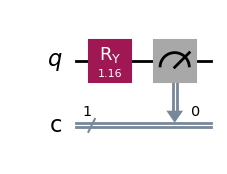

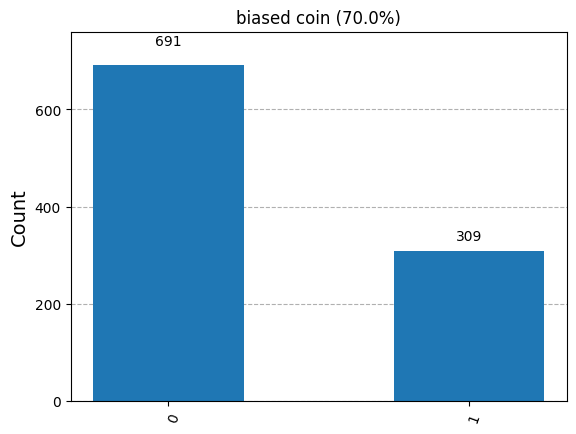

앞면(0) 확률: 69.1%
뒷면(1) 확률: 30.9%


In [46]:
prob_heads = 0.7
def biased_quantum_coin(prob_heads=prob_heads):
    """편향된 양자 동전"""
    qc = QuantumCircuit(1, 1)
    
    # 회전 각도 계산
    theta = 2 * np.arccos(np.sqrt(prob_heads))
    
    # Y축 회전으로 편향 생성
    qc.ry(theta, 0)
    
    # 측정
    qc.measure(0, 0)
    
    return qc

# 70% 확률로 앞면이 나오는 동전
biased_coin = biased_quantum_coin(0.7)
print("편향된 동전 회로:")
biased_coin.draw('mpl')

# 1000번 시뮬레이션
transpiled = transpile(biased_coin, backend)
job = sampler.run([(transpiled, [])], shots=1000)
result = job.result()
counts = result[0].data.c.get_counts()

# 결과 시각화
plot_histogram(counts)
plt.title(f"biased coin ({prob_heads*100}%)")
plt.show()

print(f"앞면(0) 확률: {counts.get('0', 0)/1000:.1%}")
print(f"뒷면(1) 확률: {counts.get('1', 0)/1000:.1%}")

### 4.3 양자 주사위 만들기

양자 주사위 회로:


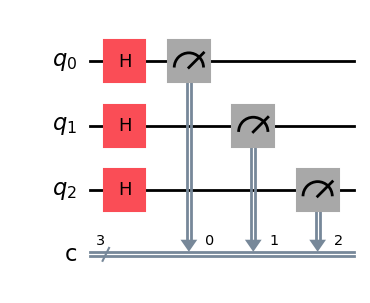

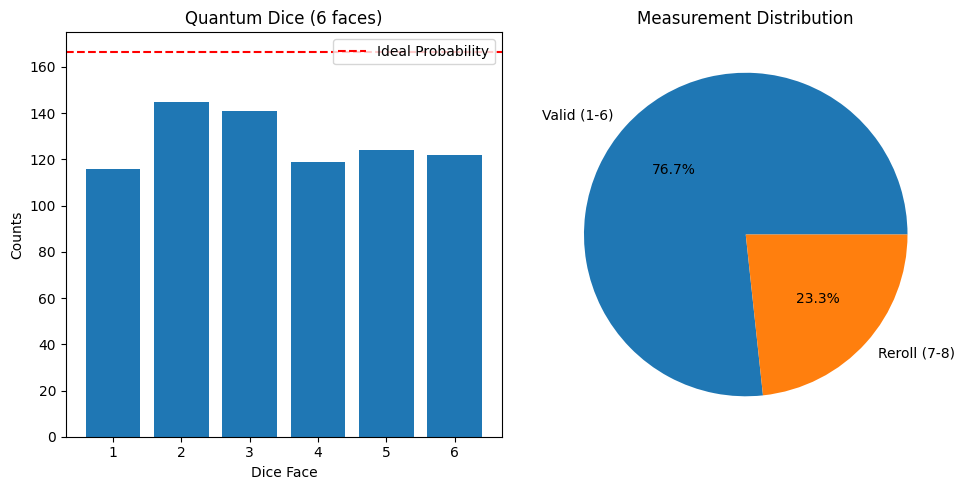


Reroll required: 23.3%


In [53]:
def quantum_dice():
    """6면 양자 주사위"""
    # 3큐비트 사용 (2^3 = 8개 상태)
    qc = QuantumCircuit(3, 3)
    
    # 균등 중첩
    qc.h(0)
    qc.h(1)
    qc.h(2)
    
    # 측정
    qc.measure([0, 1, 2], [0, 1, 2])
    
    return qc

# 주사위 실행
dice = quantum_dice()
print("양자 주사위 회로:")
dice.draw('mpl')

# 시뮬레이션
transpiled = transpile(dice, backend)
job = sampler.run([(transpiled, [])], shots=1000)
result = job.result()
counts = result[0].data.c.get_counts()

# 0~5를 1~6으로 매핑 (6, 7은 다시 굴림)
dice_results = {i+1: 0 for i in range(6)}
reroll_count = 0

for outcome_str, count in counts.items():
    outcome = int(outcome_str, 2)
    if outcome < 6:
        dice_results[outcome + 1] += count
    else:
        reroll_count += count

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(dice_results.keys(), dice_results.values())
plt.xlabel('Dice Face')
plt.ylabel('Counts')
plt.title('Quantum Dice (6 faces)')
plt.axhline(y=1000/6, color='r', linestyle='--', label='Ideal Probability')
plt.legend()

plt.subplot(1, 2, 2)
labels = ['Valid (1-6)', 'Reroll (7-8)']
sizes = [sum(dice_results.values()), reroll_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Measurement Distribution')

plt.tight_layout()
plt.show()

print(f"\nReroll required: {reroll_count/1000:.1%}")

### 4.4 양자 난수 생성기

In [4]:
def quantum_random_number(n_bits=8):
    """n비트 양자 난수 생성"""
    qc = QuantumCircuit(n_bits, n_bits)
    
    # 모든 큐비트를 중첩 상태로
    for i in range(n_bits):
        qc.h(i)
    
    # 측정
    qc.measure(range(n_bits), range(n_bits))
    
    # 실행
    transpiled = transpile(qc, backend)
    job = sampler.run([(transpiled, [])], shots=1)
    result = job.result()
    counts = result[0].data.c.get_counts()
    
    # 결과를 정수로 변환
    random_number = list(counts.keys())[0]
    random_number = int(random_number, 2)
    return random_number

# 8비트 난수 생성 (0~255)
print("8비트 양자 난수 10개 생성:")
random_numbers = [quantum_random_number(8) for _ in range(10)]

for i, num in enumerate(random_numbers, 1):
    binary = format(num, '08b')
    print(f"  {i:2}. {binary} = {num:3}")

print(f"\n평균: {np.mean(random_numbers):.1f} (ideal: 127.5)")
print(f"표준편차: {np.std(random_numbers):.1f} (ideal: 73.9)")

8비트 양자 난수 10개 생성:
   1. 01111110 = 126
   2. 00101101 =  45
   3. 10011101 = 157
   4. 10110010 = 178
   5. 00011100 =  28
   6. 00110001 =  49
   7. 11010010 = 210
   8. 00111101 =  61
   9. 01111011 = 123
  10. 01110111 = 119

평균: 109.6 (ideal: 127.5)
표준편차: 58.7 (ideal: 73.9)


## 🎯 도전 과제

### 도전 1: 3-큐비트 GHZ State

GHZ State 회로:


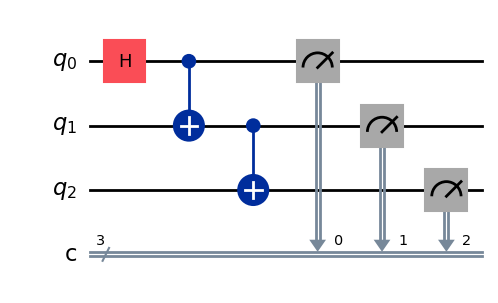

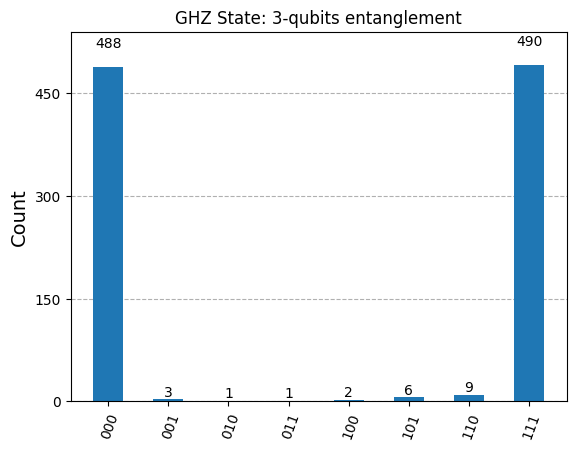

000과 111만 나타납니다 - 3개 큐비트가 완벽하게 얽혔습니다!


In [7]:
# GHZ State: 3개 큐비트가 모두 얽힌 상태
# |GHZ⟩ = (|000⟩ + |111⟩)/√2

def create_ghz_state():
    """3-큐비트 GHZ state 생성"""
    qc = QuantumCircuit(3, 3)
    
    # 여기에 코드를 작성하세요
    # 힌트: H 게이트 1개와 CNOT 게이트 2개
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(1, 2)
    
    qc.measure([0, 1, 2], [0, 1, 2])
    return qc

# 테스트
ghz = create_ghz_state()
print("GHZ State 회로:")
ghz.draw('mpl')

# 실행
transpiled = transpile(ghz, backend)
job = sampler.run([(transpiled, [])], shots=1000)
result = job.result()
counts = result[0].data.c.get_counts()

plot_histogram(counts)
plt.title("GHZ State: 3-qubits entanglement")
plt.show()

print("000과 111만 나타납니다 - 3개 큐비트가 완벽하게 얽혔습니다!")

## 📝 Session 1 요약

### 오늘 배운 것:
1. **큐비트**: 0과 1의 중첩 상태
2. **기본 게이트**: X (NOT), H (Hadamard), CNOT
3. **Bell State**: 양자 얽힘의 기본
4. **응용**: 양자 동전, 주사위, 난수 생성기

### 핵심 개념:
- **중첩**: 여러 상태가 동시에 존재
- **얽힘**: 큐비트들의 운명적 연결
- **측정**: 양자 상태의 붕괴

### 다음 세션 예고:
- 양자 텔레포테이션
- 더 복잡한 회로 설계
- 실제 양자 컴퓨터 사용법

In [ ]:
# 축하합니다! 🎉
print("🎊 Session 1 완료!")
print("\n당신은 이제:")
print("✅ 양자 회로를 만들 수 있습니다")
print("✅ 기본 양자 게이트를 사용할 수 있습니다")
print("✅ Bell State를 이해합니다")
print("✅ 양자 응용 프로그램을 만들 수 있습니다")
print("\n다음 세션에서 더 놀라운 것들을 배워봅시다! 🚀")